In [1]:
import pandas as pd

In [2]:
# Utilities for plotting; not part of week 2 content
# All plotting can also be done without this code block
import matplotlib.pyplot as plt

# Render our plots inline
%matplotlib inline

# Make the graphs a bit prettier, and bigger
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 5)

We're going to use a new dataset here, to demonstrate how to deal with larger datasets. This is a subset of the of 311 service requests from [NYC Open Data](https://nycopendata.socrata.com/Social-Services/311-Service-Requests-from-2010-to-Present/erm2-nwe9). 

In [3]:
# because of mixed types we specify dtype to prevent any errors
df = pd.read_csv('../data/311-service-requests.csv', dtype='unicode')
df

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111064,26426013,10/04/2013 12:01:13 AM,10/07/2013 04:07:16 PM,DPR,Department of Parks and Recreation,Maintenance or Facility,Structure - Outdoors,Park,11213,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
111065,26428083,10/04/2013 12:01:05 AM,10/04/2013 02:13:50 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11434,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.656160351546845,-73.76735262738222,"(40.656160351546845, -73.76735262738222)"
111066,26428987,10/04/2013 12:00:45 AM,10/04/2013 01:25:01 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,10016,344 EAST 28 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.740295354643706,-73.97695165980414,"(40.740295354643706, -73.97695165980414)"
111067,26426115,10/04/2013 12:00:28 AM,10/04/2013 04:17:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Club/Bar/Restaurant,11226,1233 FLATBUSH AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.64018174662485,-73.95530566958138,"(40.64018174662485, -73.95530566958138)"


The data set is quite big. Let's just get the first 5 rows first:

In [4]:
df.head(5)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,26589651,10/31/2013 02:08:41 AM,NaN,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11432,90-03 169 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.70827532593202,-73.79160395779721,"(40.70827532593202, -73.79160395779721)"
1,26593698,10/31/2013 02:01:04 AM,NaN,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,11378,58 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.721040535628305,-73.90945306791765,"(40.721040535628305, -73.90945306791765)"
2,26594139,10/31/2013 02:00:24 AM,10/31/2013 02:40:32 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,10032,4060 BROADWAY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.84332975466513,-73.93914371913482,"(40.84332975466513, -73.93914371913482)"
3,26595721,10/31/2013 01:56:23 AM,10/31/2013 02:21:48 AM,NYPD,New York City Police Department,Noise - Vehicle,Car/Truck Horn,Street/Sidewalk,10023,WEST 72 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.7780087446372,-73.98021349023975,"(40.7780087446372, -73.98021349023975)"
4,26590930,10/31/2013 01:53:44 AM,NaN,DOHMH,Department of Health and Mental Hygiene,Rodent,Condition Attracting Rodents,Vacant Lot,10027,WEST 124 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.80769092704951,-73.94738703491433,"(40.80769092704951, -73.94738703491433)"


Another helpful way to get a hold of the data is to print the column names.

In [5]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Action Updated Date', 'Community Board', 'Borough',
       'X Coordinate (State Plane)', 'Y Coordinate (State Plane)',
       'Park Facility Name', 'Park Borough', 'School Name', 'School Number',
       'School Region', 'School Code', 'School Phone Number', 'School Address',
       'School City', 'School State', 'School Zip', 'School Not Found',
       'School or Citywide Complaint', 'Vehicle Type', 'Taxi Company Borough',
       'Taxi Pick Up Location', 'Bridge Highway Name',
       'Bridge Highway Direction', 'Road Ramp', 'Bridge Highway Segment',
       'Garage Lot Name', 'Ferry Direction', 'Ferry Termina

# Selecting columns and rows

To select a column, we index with the name of the column, like this:

In [6]:
df['Complaint Type']

0         Noise - Street/Sidewalk
1                 Illegal Parking
2              Noise - Commercial
3                 Noise - Vehicle
4                          Rodent
                   ...           
111064    Maintenance or Facility
111065            Illegal Parking
111066    Noise - Street/Sidewalk
111067         Noise - Commercial
111068           Blocked Driveway
Name: Complaint Type, Length: 111069, dtype: object

It returns a new `pd.Series` object, which is like a "rich" numpy array that can have different indices instead of zero to n-1.

It's often helpful to get all the unique values for a specific column, so that can see all values that are encountered.

In [7]:
df['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Illegal Parking', 'Noise - Commercial',
       'Noise - Vehicle', 'Rodent', 'Blocked Driveway',
       'Noise - House of Worship', 'Street Light Condition',
       'Harboring Bees/Wasps', 'Taxi Complaint', 'Homeless Encampment',
       'Traffic Signal Condition', 'Food Establishment', 'Noise - Park',
       'Broken Muni Meter', 'Benefit Card Replacement',
       'Sanitation Condition', 'ELECTRIC', 'PLUMBING', 'HEATING',
       'GENERAL CONSTRUCTION', 'Street Condition', 'Consumer Complaint',
       'Derelict Vehicles', 'Noise', 'Drinking', 'Indoor Air Quality',
       'Panhandling', 'Derelict Vehicle', 'Lead', 'Water System',
       'Noise - Helicopter', 'Homeless Person Assistance',
       'Root/Sewer/Sidewalk Condition', 'Sidewalk Condition', 'Graffiti',
       'DOF Literature Request', 'Animal in a Park',
       'Overgrown Tree/Branches', 'Air Quality', 'Dirty Conditions',
       'Water Quality', 'Other Enforcement', 'Collection Truck Noise',
     

This is quite a lot and not very helpful. In such a case, we are more interested in the most frequent type of complaints. Fortunately, we can use `value_counts` for that.

In [8]:
complaints = df['Complaint Type']
complaints.value_counts()

HEATING                           14200
GENERAL CONSTRUCTION               7471
Street Light Condition             7117
DOF Literature Request             5797
PLUMBING                           5373
                                  ...  
Municipal Parking Facility            1
Tunnel Condition                      1
DHS Income Savings Requirement        1
Stalled Sites                         1
X-Ray Machine/Equipment               1
Name: Complaint Type, Length: 165, dtype: int64

But it gets better! We can plot the top 50 complaint types.

<AxesSubplot:>

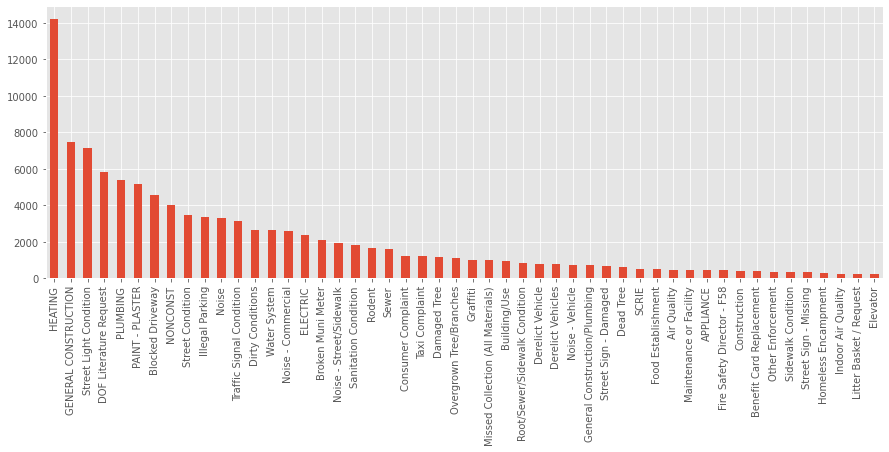

In [9]:
complaints.value_counts()[:50].plot(kind='bar')

# Selecting multiple columns

What if we just want to know the complaint type and the borough, but not the rest of the information? Pandas makes it really easy to select a subset of the columns: just index with list of columns you want.

In [10]:
subset = df[['Complaint Type', 'Descriptor', 'Borough']].copy()
subset

,Complaint Type,Descriptor,Borough
0,Noise - Street/Sidewalk,Loud Talking,QUEENS
1,Illegal Parking,Commercial Overnight Parking,QUEENS
2,Noise - Commercial,Loud Music/Party,MANHATTAN
3,Noise - Vehicle,Car/Truck Horn,MANHATTAN
4,Rodent,Condition Attracting Rodents,MANHATTAN
...,...,...,...
111064,Maintenance or Facility,Structure - Outdoors,BROOKLYN
111065,Illegal Parking,Posted Parking Sign Violation,QUEENS
111066,Noise - Street/Sidewalk,Loud Talking,MANHATTAN
111067,Noise - Commercial,Loud Talking,BROOKLYN


# Which borough has the most noise complaints?

How can we answer this question best? The easiest way is to filter the dataset first on the desired complaint type.

In [11]:
noise = subset[subset['Complaint Type'] == 'Noise - Street/Sidewalk'].copy()

Now that we have the rows that correspound to the noise complaints, we can use `value_counts` to get the number of complaints for each borough.

In [12]:
noise['Borough'].value_counts()

MANHATTAN        917
BROOKLYN         456
BRONX            292
QUEENS           226
STATEN ISLAND     36
Unspecified        1
Name: Borough, dtype: int64

Another way is to use `groupby` as shown in the previous notebook on bike paths.

In [13]:
noise.groupby('Borough')['Complaint Type'].agg([len])

,len
Borough,
BRONX,292
BROOKLYN,456
MANHATTAN,917
QUEENS,226
STATEN ISLAND,36
Unspecified,1


# Making new columns


Suppose that we want to add additional information to the `subset` dataframe. For example, we want to add the column `Agency` from the original dataframe.

In [14]:
subset['Agency'] = df['Agency']
subset

,Complaint Type,Descriptor,Borough,Agency
0,Noise - Street/Sidewalk,Loud Talking,QUEENS,NYPD
1,Illegal Parking,Commercial Overnight Parking,QUEENS,NYPD
2,Noise - Commercial,Loud Music/Party,MANHATTAN,NYPD
3,Noise - Vehicle,Car/Truck Horn,MANHATTAN,NYPD
4,Rodent,Condition Attracting Rodents,MANHATTAN,DOHMH
...,...,...,...,...
111064,Maintenance or Facility,Structure - Outdoors,BROOKLYN,DPR
111065,Illegal Parking,Posted Parking Sign Violation,QUEENS,NYPD
111066,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,NYPD
111067,Noise - Commercial,Loud Talking,BROOKLYN,NYPD


What if we want to add a column that is not already available to us, e.g., the full address? We can make this using the data in df:

In [15]:
subset['Full Address'] = df['Street Name'] + ' ' + df['Incident Zip'] + ' ' + df['City']
subset

,Complaint Type,Descriptor,Borough,Agency,Full Address
0,Noise - Street/Sidewalk,Loud Talking,QUEENS,NYPD,169 STREET 11432 JAMAICA
1,Illegal Parking,Commercial Overnight Parking,QUEENS,NYPD,58 AVENUE 11378 MASPETH
2,Noise - Commercial,Loud Music/Party,MANHATTAN,NYPD,BROADWAY 10032 NEW YORK
3,Noise - Vehicle,Car/Truck Horn,MANHATTAN,NYPD,WEST 72 STREET 10023 NEW YORK
4,Rodent,Condition Attracting Rodents,MANHATTAN,DOHMH,WEST 124 STREET 10027 NEW YORK
...,...,...,...,...,...
111064,Maintenance or Facility,Structure - Outdoors,BROOKLYN,DPR,NaN
111065,Illegal Parking,Posted Parking Sign Violation,QUEENS,NYPD,NaN
111066,Noise - Street/Sidewalk,Loud Talking,MANHATTAN,NYPD,EAST 28 STREET 10016 NEW YORK
111067,Noise - Commercial,Loud Talking,BROOKLYN,NYPD,FLATBUSH AVENUE 11226 BROOKLYN
